In [45]:
import numpy as np

# List of Orbital Periods (minutes).
N = 20 #(resolution)
T = np.linspace(110,160,N)

# Some Constants.
G = 6.67e-11 # Universal Gravitational constant (m^3.kg^-1.s^-2)
m_lunar = 7.35e22 # Lunar Mass (kg)
r_lunar = 1.737e6 # Lunar Radius (m)

# Define Newton-Raphson solver function.
def NRsolve(f,x_0,y,h = 1.,dx = 10e-5):
    '''
    x_0 = initial value to iterate from
    y = second function term, constant for one instance NRsolver
    dx = step size
    h = tolerance
    '''
    # Approx. Derivative.
    def df(f,x,y,dx):
        return (f(x+dx,y)-f(x,y))/dx

    # Iterate until the difference between solutions is less than tolerance h.
    iterations = 0 # Set counter.
    difference = h
    x_i = x_0
    while not difference < h:
        iterations += 1 # Increase counter.
        x_prev = x_i
        x_i = x_i - f(x_i,y)/df(f,x_i,y,dx)
        difference = abs(x_prev - x_i)
    
    return x_i

In [61]:
def Kepler3(a,T):
    T = T*60 # adjust minutes to seconds
    return T**2 - (4 *np.pi**2 *a**3 /G /m_lunar)

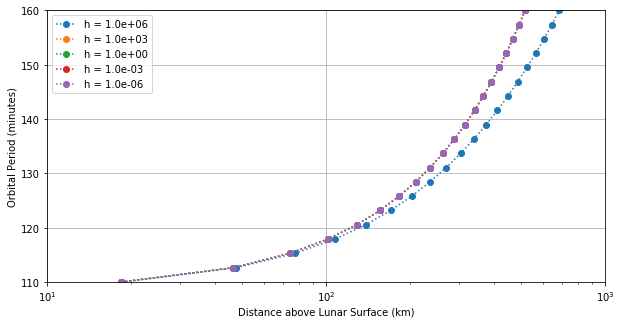

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

H = [10**6,10**3,10**0,10**-3,10**-6]
for h in H:
    A = [(NRsolve(Kepler3,r_lunar,t,h=h)) for t in T]
    A = [a - r_lunar for a in A] # minus lunar radius
    A = [a*1e-3 for a in A] # convert to km
    plt.semilogx(A,T,'o:',label=f'h = {h:.1e}')

plt.ylim(T[0],T[-1])
plt.xlim(10,10**3)
plt.ylabel('Orbital Period (minutes)')
plt.xlabel('Distance above Lunar Surface (km)')

plt.legend()
plt.grid()
plt.show()